In [1]:
import torch

In [2]:
names = ["fineweb", "stack_full", "c4", "arxiv", "synthetic-data", "stack-pull-requests", "stack-jupyter-scripts", "stack-jupyter-structured",
         "open-web-math", "stack-issues", "stackoverflow", "wikipedia", "project-gutenberg", "deepmind-math", "stack-kaggle-scripts", "stack-documentation"]

In [3]:
xs = torch.tensor([0.0903, 0.0194, 0.1202, 0.0266, 0.1011, 0.1131, 0.0071, 0.0515, 0.0922,
        0.0456, 0.0510, 0.0919, 0.1063, 0.0018, 0.0419, 0.0399])

In [4]:
for name, weight in zip(names, xs):
    print(f"{name}: {weight}")

fineweb: 0.09030000120401382
stack_full: 0.01940000057220459
c4: 0.12020000070333481
arxiv: 0.026599999517202377
synthetic-data: 0.10109999775886536
stack-pull-requests: 0.11309999972581863
stack-jupyter-scripts: 0.0071000000461936
stack-jupyter-structured: 0.051500000059604645
open-web-math: 0.09220000356435776
stack-issues: 0.04560000076889992
stackoverflow: 0.050999999046325684
wikipedia: 0.09189999848604202
project-gutenberg: 0.1062999963760376
deepmind-math: 0.0017999999690800905
stack-kaggle-scripts: 0.04190000146627426
stack-documentation: 0.039900001138448715


In [11]:
for i in torch.argsort(xs, descending=True):
    print(f"name: {names[i]}, domain_weights: {xs[i]}, num samples per step: {512*xs[i]}")

name: c4, domain_weights: 0.12020000070333481, num samples per step: 61.54240036010742
name: stack-pull-requests, domain_weights: 0.11309999972581863, num samples per step: 57.90719985961914
name: project-gutenberg, domain_weights: 0.1062999963760376, num samples per step: 54.42559814453125
name: synthetic-data, domain_weights: 0.10109999775886536, num samples per step: 51.76319885253906
name: open-web-math, domain_weights: 0.09220000356435776, num samples per step: 47.20640182495117
name: wikipedia, domain_weights: 0.09189999848604202, num samples per step: 47.052799224853516
name: fineweb, domain_weights: 0.09030000120401382, num samples per step: 46.23360061645508
name: stack-jupyter-structured, domain_weights: 0.051500000059604645, num samples per step: 26.368000030517578
name: stackoverflow, domain_weights: 0.050999999046325684, num samples per step: 26.11199951171875
name: stack-issues, domain_weights: 0.04560000076889992, num samples per step: 23.347200393676758
name: stack-kagg

In [10]:
512 * 0.0017999999690800905

0.9215999841690063

### Leandro vs DoReMi

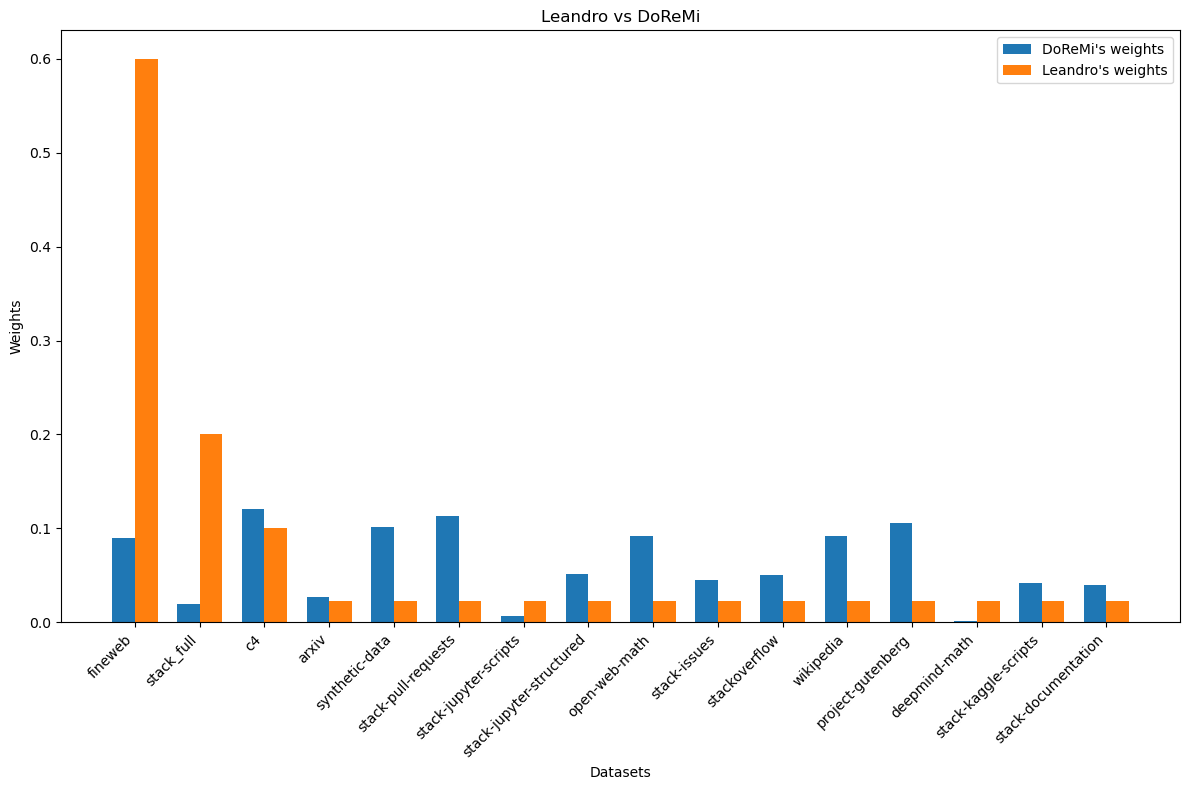

In [9]:
import matplotlib.pyplot as plt

# Doremi weights
doremi_weights = {
    "fineweb": 0.09030000120401382,
    "stack_full": 0.01940000057220459,
    "c4": 0.12020000070333481,
    "arxiv": 0.026599999517202377,
    "synthetic-data": 0.10109999775886536,
    "stack-pull-requests": 0.11309999972581863,
    "stack-jupyter-scripts": 0.0071000000461936,
    "stack-jupyter-structured": 0.051500000059604645,
    "open-web-math": 0.09220000356435776,
    "stack-issues": 0.04560000076889992,
    "stackoverflow": 0.050999999046325684,
    "wikipedia": 0.09189999848604202,
    "project-gutenberg": 0.1062999963760376,
    "deepmind-math": 0.0017999999690800905,
    "stack-kaggle-scripts": 0.04190000146627426,
    "stack-documentation": 0.039900001138448715,
}

# Leandro's weights (assuming "the rest" are the ones not explicitly mentioned and are equally divided)
leandro_weights = {
    "fineweb": 0.6,
    "stack_full": 0.2,
    # Dividing the rest equally, which are 14 datasets, so 0.4 / 14 for each
    "c4": 0.1,
    "arxiv": 0.3 / 13,
    "synthetic-data": 0.3 / 13,
    "stack-pull-requests": 0.3 / 13,
    "stack-jupyter-scripts": 0.3 / 13,
    "stack-jupyter-structured": 0.3/13,
    "open-web-math": 0.3/13,
    "stack-issues": 0.3/13,
    "stackoverflow": 0.3/13,
    "wikipedia": 0.3/13,
    "project-gutenberg": 0.3/13,
    "deepmind-math": 0.3/13,
    "stack-kaggle-scripts": 0.3/13,
    "stack-documentation": 0.3/13,
}

# Adjusting Leandro's weights for all datasets, assuming "the rest" includes all others not explicitly mentioned
for key in doremi_weights:
    if key not in leandro_weights:
        leandro_weights[key] = leandro_weights["rest"]

# Removing the 'rest' key since it was just a placeholder
leandro_weights.pop("rest", None)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
index = range(len(doremi_weights))
bar_width = 0.35

ax.bar(index, doremi_weights.values(), bar_width, label="DoReMi's weights")
ax.bar([i+bar_width for i in index], leandro_weights.values(), bar_width, label="Leandro's weights")

ax.set_xlabel('Datasets')
ax.set_ylabel('Weights')
ax.set_title('Leandro vs DoReMi')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(doremi_weights.keys(), rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


### Token count

The smallest domain has `1.656392322` B tokens

In [17]:
context_length = 1024

In [18]:
num_samples_per_step = (1/16 * 512)

In [19]:
(1.656392322 * 10**9) / context_length / num_samples_per_step

50549.082092285156